In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
import sys
hydropath = "../"
sys.path.append(hydropath)
import hydromix
import re
from hydromix.mixingfunctions import *

* Created on: 8th November 2018 by Harsh Beria
* Original paper at https://gmd.copernicus.org/articles/13/2433/2020/#section3
* Original code at https://github.com/harshberia93/HydroMix/tree/20191007_GMD
* Computes the proportion of groundwater that is made of snow vs rain
* SourceFiles used: SourceFiles/Rain_SP_GW_VdN.xlsx
* OutputFiles processed: OutputFiles/VdN/H2_results.csv, OutputFiles/VdN/O18_results.csv
* Figures made: OutputFiles/VdN/posterior.jpeg


https://gmd.copernicus.org/articles/13/2433/2020/#section3

The objective of this case study is to infer the proportional contributions of snow versus rainfall to the groundwater of an Alpine headwater catchment, Vallon de Nant (Switzerland), using stable water isotopes.
3.4.1 Catchment description

Vallon de Nant is a 13.4 km2 catchment located in the Vaud Alps in the southwest of Switzerland (Fig. 1), with elevation ranging from 1253 m to 3051 m a.s.l. Steep slopes form a major part of the catchment with a mean catchment slope of around 36∘ (Thornton et al., 2018). At lower elevations, a dense forest dominated by Picea abies covers 14 % of the catchment area. At around 1500 m a.s.l., there is an active pasture area with scattered trees and an open forest dominated by Larix decidua. Additional species scattered throughout the catchment include Pinus sp., Alnus sp., and Acer pseudoplatanus. Alpine meadows cover most of the higher-elevation land surfaces. Despite the relatively low elevation, there is a small glacier on its southwestern tip, which covers around 4.4 % of the catchment area, below which an extended moraine occupies 10.1 % of the catchment area. A large part (28 % of catchment area) of the hillslopes are composed of steep rock walls. At lower to mid-elevations, talus slopes account for about 6 % of the catchment area.

Vallon de Nant has a typical Alpine climate, with around 1900 mm of annual precipitation and a mean air temperature of 1.8 ∘C (Michelon, 2017). For this paper, long-term climate statistics are computed using the MeteoSwiss gridded precipitation and air temperature dataset for 1961–2015 (Isotta et al., 2013; MeteoSwiss, 2016, 2017). Applying a simple temperature threshold (0 and 1 ∘C) to observed precipitation indicates that, on average, 40 %–45 % of the total precipitation falls as snow in the catchment. There is a small degree of seasonality in precipitation, with higher precipitation between June and August and lower precipitation in the months of September and October.

![title](https://gmd.copernicus.org/articles/13/2433/2020/gmd-13-2433-2020-f01-web.png)


HydroMix is used to estimate the proportion of snow recharging groundwater (subsequently referred to as the “snow recharge coefficient”). In order to obtain a PDF of the snow recharge coefficient, isotopic ratios in all the water samples from rain, snowpack, and groundwater are used. A uniform prior distribution is assigned to the snow recharge coefficient, which varies between 0 and 1, representing the entire range of possible values.

# VdN_Mixing

## Import Parameters

In [4]:
# Main variables

number_iterations = 500
LAMBDA_RANGE = [0., 1.] # LAMBDA values imply the fraction of snow in groundwater
# Number of best simulations using which lambda is computed
BEST_SIM_PER = 5. # In percentage

#outputfilepath = "OutputFiles/VdN/"
outputfilepath = hydropath + "/OutputFiles/GW_conceptual/"

# etting up a random seed
np.random.seed(1) # Setting up a common seed number

# Reading all the isotopic data

filename = hydropath + "/SourceFiles/Rain_SP_GW_VdN.xlsx"
df = pd.read_excel(filename, sheet_name='Sheet1')

In [5]:
# Separating the isotopic ratios in rain, snow and groundwater
rain_df = df[(df["Type"] == "Rain")]
snow_df = df[(df["Type"] == "Snow")]
gw_df = df[(df["Type"] == "Groundwater")]

# Initializing the model parameters
lambda_params = np.random.uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1], number_iterations)

# Assuming constant error variance computed from data
likelihood_std_params_h2 = np.full(number_iterations, np.std(gw_df["H2 isotope"].values, ddof=1))
likelihood_std_params_o18 = np.full(number_iterations, np.std(gw_df["O18 isotope"].values, ddof=1))

## Run Hydromix Model

### Running HydroMix for H2

In [7]:
# Running HydroMix for H2

rain, snow, gw = rain_df["H2 isotope"].values, snow_df["H2 isotope"].values, gw_df["H2 isotope"].values
likelihood_h2, LAMBDA_H2, ErrorSTD_H2 = hydro_mix(snow, rain, gw, lambda_params, likelihood_std_params_h2, number_iterations)

# Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std"]]
path = outputfilepath + "H2_results.csv"
for index in range(0, len(likelihood_h2)):
    final_lis.append([round(LAMBDA_H2[index], 2), round(likelihood_h2[index], 2), round(ErrorSTD_H2[index], 2)])

print (path)

Iteration number:1
Iteration number:101
Iteration number:201
Iteration number:301
Iteration number:401
..//OutputFiles/GW_conceptual/H2_results.csv


### Running HydroMix for O18

In [8]:
# Running HydroMix for O18

rain, snow, gw = rain_df["O18 isotope"].values, snow_df["O18 isotope"].values, gw_df["O18 isotope"].values
likelihood_o18, lambda_o18, error_std_o18 = hydro_mix(snow, rain, gw, lambda_params, likelihood_std_params_o18, number_iterations)

# Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std"]]
path = outputfilepath + "O18_results.csv"
for index in range(0, len(likelihood_o18)):
    final_lis.append([round(lambda_o18[index], 2), round(likelihood_o18[index], 2), round(error_std_o18[index], 2)])


print (path)


Iteration number:1
Iteration number:101
Iteration number:201
Iteration number:301
Iteration number:401
..//OutputFiles/GW_conceptual/O18_results.csv


## Histogram plot showing snow ratio in groundwater using H2 and O18

Using the dataset from an Alpine catchment (Vallon de Nant, Switzerland), HydroMix estimates that 60 %–62 % of the groundwater is recharged from snowmelt (using unweighted approach), with the full posterior distributions shown in Fig. 8a. This estimate is consistent for both of the isotopic tracers (δ2H and δ18O), which are often used interchangeably in the hydrologic literature (Gat, 1996). Comparing this recharge estimate to the proportion of total precipitation that falls as snow (around 40 %–45 %; see Sect. 3.4.1) suggests that snowmelt is more effective at reaching the aquifer than an equivalent amount of rainfall falling at a different period of the year. Similar results have been obtained in a number of previous studies across the temperate and mountainous regions of the world (see Table 1 in the work of Beria et al., 2018, for a summary).

..//OutputFiles/GW_conceptual/posterior.jpeg


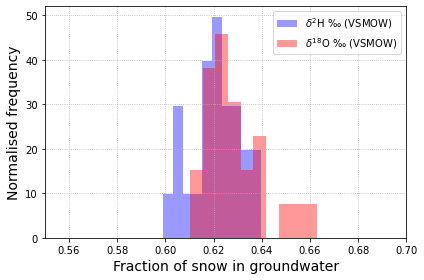

In [9]:
# %% Histogram plot showing snow ratio in groundwater using H2 and O18

plt.figure()
plt.hist(LAMBDA_H2[0:int(0.01 * BEST_SIM_PER * number_iterations)], density=True,
         color='blue', alpha=0.4, label=r'$\delta^{2}$H' + u' \u2030 (VSMOW)')
plt.hist(lambda_o18[0:int(0.01 * BEST_SIM_PER * number_iterations)], density=True,
         color='red', alpha=0.4, label=r'$\delta^{18}$O' + u' \u2030 (VSMOW)')
plt.xlim(0.55, .7)
plt.grid(linestyle='dotted')
plt.xlabel("Fraction of snow in groundwater", fontsize=14)
plt.ylabel("Normalised frequency", fontsize=14)
plt.legend()
plt.tight_layout()
path = outputfilepath + "posterior.jpeg"
plt.savefig(path, dpi=300)

print (path)

# VdN_mixing_additional_params

* Created on 12th November 2018 by Harsh Beria
* Computes the proportion of groundwater that is made of snow vs rain
* Introduced additional model parameters (isotopic lapse rate)
* SourceFiles used: SourceFiles/Rain_SP_GW_VdN.xlsx, SourceFiles/Hypsometric_curve_data.xlsx
* OutputFiles processed: OutputFiles/VdN/Lapse_rate/H2_results.csv, OutputFiles/VdN/Lapse_rate/O18_results.csv
* Figures made: OutputFiles/VdN/Lapse_rate/lapse_rate_posterior.jpeg, OutputFiles/VdN/Lapse_rate/posterior.jpeg

In any mixing analysis, it may be useful or desirable for users to specify an additional model parameter that is able to modify the tracer concentrations based on their process understanding of the system. In the case of Alpine catchments with large elevation gradients, stable isotopes in precipitation often exhibit a systematic trend with elevation, becoming more depleted in heavier isotopes with increasing elevation. This is also known as the “isotopic lapse rate” (Dansgaard, 1964; Friedman et al., 1964). In typical field campaigns, because of logistical challenges, precipitation samples are collected only at a few points in a catchment, with often fewer precipitation samples at high elevations. This leads to oversampling at lower elevations and undersampling at higher elevations, which can bias mixing estimates. This has been found to be especially relevant for hydrograph separation in forested catchments (Cayuela et al., 2019). To allow a process compensation for this, an additional lapse rate factor is introduced with which each observed point-scale sample (observed at a given elevation) is corrected to a reference elevation as follows:

\begin{equation*}
r¯=∑kj=1[α(ej−e)+r]aj∑kj=1aj
\end{equation*}

where r is the isotopic ratio in precipitation collected at elevation e, r¯ is the catchment-averaged isotopic ratio in precipitation, α is the isotopic lapse rate factor, ej is the elevation of the jth elevation band, and aj is the catchment area under the jth elevation band; the catchment is divided into k elevation bands. These bands are obtained by constructing a hypsometric curve of the catchment (Strahler, 1952).

The lapse rate factor is allowed to modify both rainfall and snowpack isotopic ratios to obtain a catchment-averaged isotopic ratio, which is then used in the mixing model. Using this formulation of an isotopic lapse rate makes the following implicit assumptions: (1) precipitation storms on aggregate move from the lower part of the catchment to the upper part of the catchment, thus creating a lapse rate effect, and (2) precipitation falls uniformly over the catchment. It is important to note that the isotopic lapse rate is different from the precipitation lapse rate; i.e., the rate of change of precipitation with elevation is different from the rate of change of the precipitation isotopic ratio with elevation.

## Set Up Parameters

### Main variables

In [10]:
NUMBER_ITERATIONS = 500

# Bayesian model parameters (in the given range (inclusive))
LAMBDA_RANGE = [0., 1.]  # LAMBDA values imply the fraction of snow in groundwater
O18_LAPSE_SLOPE = [-0.0081, 0.0081]  # Obtained from GNIP Swiss data (-0.0027)
H2_LAPSE_SLOPE = [-0.0582, 0.0582]  # Obtained from GNIP Swiss data (-0.0194)

SWISS_LAPSE = {"H2": -0.0194, "O18": -0.0027}  # Swiss lapse rate according to GNIP data
SWISS_LAPSE_lowBound = {"H2": -0.029, "O18": -0.0039}  # Swiss lapse rate according to GNIP data
SWISS_LAPSE_highBound = {"H2": -0.0076, "O18": -0.0013}  # Swiss lapse rate according to GNIP data

# Number of best simulations using which lambda is computed
BEST_SIM_PER = 5.  # In percentage

HYPS_DIC = {}  # Key is elevation and value is the percent of catchment at that elevation

OUTPUTFILEPATH = hydropath + "/OutputFiles/VdN/Lapse_rate/"

# %% Setting up a random seed
np.random.seed(1)  # Setting up a common seed number




### Reading the hypsometric curve data

In [11]:
filename =  hydropath + "/SourceFiles/Hypsometric_curve_data.xlsx"
df = pd.read_excel(filename, 'Sheet1')
for index, row in df.iterrows():
    temp_elev_lis = re.findall(r'\d+', row[
        'Elevation band'])  # Identifying the numbers in the string and putting them in a list
    temp_elev_lis = [float(k) for k in temp_elev_lis]  # Converting characters to floats
    elevation_avg = sum(temp_elev_lis) * 1. / len(temp_elev_lis)  # Average elevation in a given elevation band
    HYPS_DIC[elevation_avg] = float(row['Percentage of grids'])

### Reading all the isotopic data

In [12]:
filename = hydropath + "/SourceFiles/Rain_SP_GW_VdN.xlsx"
df = pd.read_excel(filename, sheet_name='Sheet1')

# Separating the isotopic ratios in rain, snow and groundwater
rain_df = df[(df["Type"] == "Rain")]
snow_df = df[(df["Type"] == "Snow")]
gw_df = df[(df["Type"] == "Groundwater")]

### Initializing the model parameters

In [13]:
# %% Initializing the model parameters

LAMBDA_params = np.random.uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1], NUMBER_ITERATIONS)
O18_lapse_param_lis = np.random.uniform(O18_LAPSE_SLOPE[0], O18_LAPSE_SLOPE[1], NUMBER_ITERATIONS)
H2_lapse_param_lis = np.random.uniform(H2_LAPSE_SLOPE[0], H2_LAPSE_SLOPE[1], NUMBER_ITERATIONS)

# Assuming constant error variance computed from data
LIKELIHOOD_std_params_H2 = np.full(NUMBER_ITERATIONS, np.std(gw_df["H2 isotope"].values, ddof=1))
LIKELIHOOD_std_params_O18 = np.full(NUMBER_ITERATIONS, np.std(gw_df["O18 isotope"].values, ddof=1))

## Running HydroMix

In [14]:
# %% Running HydroMix for H2

rain, snow, gw = rain_df["H2 isotope"].values, snow_df["H2 isotope"].values, gw_df["H2 isotope"].values
rain_elev, snow_elev = rain_df["Elevation (m)"].values, snow_df["Elevation (m)"].values
LIKELIHOOD_H2, LAMBDA_H2, LIKELIHOOD_std_params_H2, H2_lapse_param_lis = hydro_mix_elev(snow, snow_elev, rain, 
                                                                                        rain_elev, gw,
                                                                                   LAMBDA_params,
                                                                                   LIKELIHOOD_std_params_H2,
                                                                                   NUMBER_ITERATIONS,
                                                                                   H2_lapse_param_lis, HYPS_DIC)

Iteration number:1
Iteration number:101
Iteration number:201
Iteration number:301
Iteration number:401


In [15]:
# %% Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std", "H2 lapse rate"]]
path = OUTPUTFILEPATH + "H2_results.csv"
for index in range(0, len(LIKELIHOOD_H2)):
    final_lis.append(
        [round(LAMBDA_H2[index], 2), round(LIKELIHOOD_H2[index], 2), round(LIKELIHOOD_std_params_H2[index], 2),
         round(H2_lapse_param_lis[index], 2)])

print(path)

..//OutputFiles/VdN/Lapse_rate/H2_results.csv


In [16]:
# %% Running HydroMix for O18

rain, snow, gw = rain_df["O18 isotope"].values, snow_df["O18 isotope"].values, gw_df["O18 isotope"].values
LIKELIHOOD_O18, LAMBDA_O18, LIKELIHOOD_std_params_O18, O18_lapse_param_lis = hydro_mix_elev(snow, snow_elev, 
                                                                                            rain, rain_elev,
                                                                                       gw,
                                                                                       LAMBDA_params,
                                                                                       LIKELIHOOD_std_params_O18,
                                                                                       NUMBER_ITERATIONS,
                                                                                       O18_lapse_param_lis, 
                                                                                            HYPS_DIC)

# %% Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std", "O18 lapse rate"]]
path = OUTPUTFILEPATH + "O18_results.csv"
for index in range(0, len(LIKELIHOOD_O18)):
    final_lis.append(
        [round(LAMBDA_O18[index], 2), round(LIKELIHOOD_O18[index], 2), round(LIKELIHOOD_std_params_O18[index], 2),
         round(O18_lapse_param_lis[index], 2)])

print(path)

Iteration number:1
Iteration number:101
Iteration number:201
Iteration number:301
Iteration number:401
..//OutputFiles/VdN/Lapse_rate/O18_results.csv


## Histogram of snow ratio in groundwater using H2 and O18

..//OutputFiles/VdN/Lapse_rate/posterior.jpeg


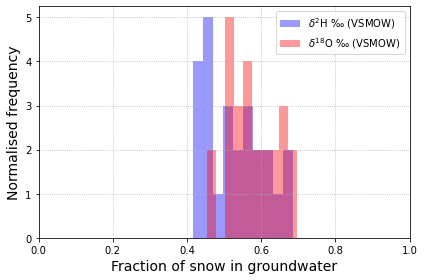

In [17]:
# %% 

plt.figure()
plt.hist(LAMBDA_H2[0:int(0.01 * BEST_SIM_PER * NUMBER_ITERATIONS)], color='blue', alpha=0.4,
         label=r'$\delta^{2}$H' + u' \u2030 (VSMOW)')
plt.hist(LAMBDA_O18[0:int(0.01 * BEST_SIM_PER * NUMBER_ITERATIONS)], color='red', alpha=0.4,
         label=r'$\delta^{18}$O' + u' \u2030 (VSMOW)')
plt.xlim(0., 1.)
plt.grid(linestyle='dotted')
plt.xlabel("Fraction of snow in groundwater", fontsize=14)
plt.ylabel("Normalised frequency", fontsize=14)
plt.legend()
plt.tight_layout()
path = OUTPUTFILEPATH + "posterior.jpeg"
plt.savefig(path, dpi=300)

print(path)



## Histogram of posterior distributions of isotopic lapse rates in 2H and 18O

Histogram showing the posterior distribution of the isotope lapse rate parameter in δ2H and δ18O. The green region shows the confidence bounds (significant at α=0.01) of the lapse rate computed over Switzerland by using inverse variance-weighted regression. The limits of the prior distribution of the isotopic lapse rates correspond to the limits of the x axis. The slope of the isotopic ratio when plotted against elevation for the Swiss-wide data is shown in Fig. 3 of Beria et al. (2018).

In [ ]:
# %% Histogram plot showing posterior distributions of isotopic lapse rates in 2H and 18O

f, axarr = plt.subplots(2, figsize=(10, 10))
axarr[0].hist(H2_lapse_param_lis[0:int(0.01 * BEST_SIM_PER * NUMBER_ITERATIONS)], color='blue', alpha=0.4)
axarr[0].set_xlim(H2_LAPSE_SLOPE[0], H2_LAPSE_SLOPE[1])
axarr[0].set_ylabel("Normalised frequency", fontsize=14)
axarr[0].set_xlabel("Lapse rate in" + r'$\ ^{2}$H', fontsize=14)
axarr[0].grid(linestyle='dotted')
# axarr[0].axvline(x=SWISS_LAPSE["H2"], color='black', label="Swiss lapse rate in" + r'$\ ^{2}$H')
axarr[0].axvspan(SWISS_LAPSE_lowBound["H2"], SWISS_LAPSE_highBound["H2"], facecolor='green', alpha=0.3,
                 label="Swiss lapse rate range in" + r'$\ ^{2}$H')
axarr[0].legend(fontsize=14)
axarr[0].tick_params(labelsize=14)

axarr[1].hist(O18_lapse_param_lis[0:int(0.01 * BEST_SIM_PER * NUMBER_ITERATIONS)], color='red', alpha=0.4)
axarr[1].set_xlim(O18_LAPSE_SLOPE[0], O18_LAPSE_SLOPE[1])
axarr[1].set_ylabel("Normalised frequency", fontsize=14)
axarr[1].set_xlabel("Lapse rate in" + r'$\ ^{18}$O', fontsize=14)
axarr[1].grid(linestyle='dotted')
# axarr[1].axvline(x=SWISS_LAPSE["O18"], color='black', label="Swiss lapse rate in" + r'$\ ^{18}$O')
axarr[1].axvspan(SWISS_LAPSE_lowBound["O18"], SWISS_LAPSE_highBound["O18"], facecolor='green', alpha=0.3,
                 label="Swiss lapse rate range in" + r'$\ ^{18}$O')
axarr[1].legend(fontsize=14)
axarr[1].tick_params(labelsize=14)

plt.tight_layout()

path = OUTPUTFILEPATH + "lapse_rate_posterior.jpeg"
plt.savefig(path, dpi=300)

print(path)


# VdN_mixing_MCMC

In [ ]:
"""
Created on: 8th November 2018 (Harsh Beria)
Last updated on: 26th September 2019 (Saved last accepted parameter in rejection step of Metropolis Hastings step)
What it does?

Computes the proportion of groundwater that is made of snow vs rain using a MCMC sampler

SourceFiles used:
SourceFiles/Rain_SP_GW_VdN.xlsx


OutputFiles processed:
OutputFiles/VdN/H2_results_MCMC.csv
OutputFiles/VdN/O18_results_MCMC.csv

Figures made: NONE
"""

from __future__ import division
import pandas as pd
import numpy as np
from hydromix.mixingfunctions import *
# %% Main variables

NUMBER_ITERATIONS = 1000
LAMBDA_RANGE = [0., 1.] # LAMBDA values imply the fraction of snow in groundwater
JUMP_PERCENTAGE = 5. # In percentage (JUMP_PERCENTAGE/2 in both directions)

OUTPUTFILEPATH = "OutputFiles/VdN/"

# %% Setting up a random seed
np.random.seed(1234) # Setting up a common seed number

# %% Reading all the isotopic data

filename = "../../../Downloads/Zenodo_dataset/Zenodo_dataset/SourceFiles/Rain_SP_GW_VdN.xlsx"
df = pd.read_excel(filename, sheet_name='Sheet1')

# Separating the isotopic ratios in rain, snow and groundwater
rain_df = df[(df["Type"] == "Rain")]
snow_df = df[(df["Type"] == "Snow")]
gw_df = df[(df["Type"] == "Groundwater")]

# %% Running HydroMix for H2

rain, snow, gw = rain_df["H2 isotope"].values, snow_df["H2 isotope"].values, gw_df["H2 isotope"].values

H2_std = np.std(gw_df["H2 isotope"].values, ddof=1) # Standard deviation of H2 in groundwater

# List of initial parameter values 
initParam = [np.random.uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1])]

# Lower and upper limits of the model parameters
paramLimit = [LAMBDA_RANGE]

# Running the mixing model
LOGLIKELIHOOD_H2, PARAM_H2, RESIDUAL_H2 = hydro_mix(snow, rain, gw, H2_std,
												   initParam, paramLimit, NUMBER_ITERATIONS, JUMP_PERCENTAGE)

snowRatioLis_H2 = [i[0] for i in PARAM_H2]

# %% Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std", "Residual"]]
path = OUTPUTFILEPATH + "H2_results_MCMC_" + str(NUMBER_ITERATIONS) + ".csv"
for index in range(0, len(LOGLIKELIHOOD_H2)):
	final_lis.append([ round(snowRatioLis_H2[index], 4), round(LOGLIKELIHOOD_H2[index], 4), round(H2_std, 4), 
				   round(RESIDUAL_H2[index], 4) ])


# %% Running HydroMix for O18

rain, snow, gw = rain_df["O18 isotope"].values, snow_df["O18 isotope"].values, gw_df["O18 isotope"].values

O18_std = np.std(gw_df["O18 isotope"].values, ddof=1) # Standard deviation of O18 in groundwater

# List of initial parameter values 
initParam = [np.random.uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1])]

# Lower and upper limits of the model parameters
paramLimit = [LAMBDA_RANGE]

# Running the mixing model
LOGLIKELIHOOD_O18, PARAM_O18, RESIDUAL_O18 = hydro_mix_mcmc(snow, rain, gw, O18_std, initParam, paramLimit, NUMBER_ITERATIONS, JUMP_PERCENTAGE)

snowRatioLis_O18 = [i[0] for i in PARAM_O18]

# %% Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std", "Residual"]]
path = OUTPUTFILEPATH + "O18_results_MCMC_" + str(NUMBER_ITERATIONS) + ".csv"
for index in range(0, len(LOGLIKELIHOOD_O18)):
	final_lis.append([ round(snowRatioLis_O18[index], 4), round(LOGLIKELIHOOD_O18[index], 4), round(O18_std, 4),
				   round(RESIDUAL_O18[index], 4) ])


# VdN_mixing_additional_params_MCMC

In [ ]:
"""
Created on: 30th September 2019 (Harsh Beria)
Last updated on
What it does?

Computes the proportion of groundwater that is made of snow vs rain using a MCMC sampler
Introduced additional model parameters (isotopic lapse rate)

SourceFiles used:
SourceFiles/Rain_SP_GW_VdN.xlsx
SourceFiles/Hypsometric_curve_data.xlsx

OutputFiles processed:
OutputFiles/VdN/Lapse_rate/H2_results_MCMC_1000.csv
OutputFiles/VdN/Lapse_rate/O18_results_MCMC_1000.csv

Figures made: NONE
"""
# %% Imports

from __future__ import division
import pandas as pd
import numpy as np
import re
from hydromix.mixingfunctions import *

# %% Main variables

NUMBER_ITERATIONS = 10000

# Bayesian model parameters (in the given range (inclusive))
LAMBDA_RANGE = [0., 1.]  # LAMBDA values imply the fraction of snow in groundwater
O18_LAPSE_SLOPE = [-0.0081, 0.0081]  # Obtained from GNIP Swiss data (-0.0027)
H2_LAPSE_SLOPE = [-0.0582, 0.0582]  # Obtained from GNIP Swiss data (-0.0194)

SWISS_LAPSE = {"H2": -0.0194, "O18": -0.0027}  # Swiss lapse rate according to GNIP data
SWISS_LAPSE_lowBound = {"H2": -0.029, "O18": -0.0039}  # Swiss lapse rate according to GNIP data
SWISS_LAPSE_highBound = {"H2": -0.0076, "O18": -0.0013}  # Swiss lapse rate according to GNIP data

JUMP_PERCENTAGE = 5.  # In percentage (JUMP_PERCENTAGE/2 in both directions)

HYPS_DIC = {}  # Key is elevation and value is the percent of catchment at that elevation

OUTPUTFILEPATH = "OutputFiles/VdN/Lapse_rate/"

# %% Setting up a random seed
np.random.seed(1)  # Setting up a common seed number

# %% Reading the hypsometric curve data

filename = "../../../Downloads/Zenodo_dataset/Zenodo_dataset/SourceFiles/Hypsometric_curve_data.xlsx"
df = pd.read_excel(filename, sheetname='Sheet1')
for index, row in df.iterrows():
    temp_elev_lis = re.findall(r'\d+', row[
        'Elevation band'])  # Identifying the numbers in the string and putting them in a list
    temp_elev_lis = [float(k) for k in temp_elev_lis]  # Converting characters to floats
    elevation_avg = sum(temp_elev_lis) * 1. / len(temp_elev_lis)  # Average elevation in a given elevation band
    HYPS_DIC[elevation_avg] = float(row['Percentage of grids'])

# %% Reading all the isotopic data

filename = "../../../Downloads/Zenodo_dataset/Zenodo_dataset/SourceFiles/Rain_SP_GW_VdN.xlsx"
df = pd.read_excel(filename, sheet_name='Sheet1')

# Separating the isotopic ratios in rain, snow and groundwater
rain_df = df[(df["Type"] == "Rain")]
snow_df = df[(df["Type"] == "Snow")]
gw_df = df[(df["Type"] == "Groundwater")]

#################################################################################################################################
# %% Running HydroMix for H2

rain, snow, gw = rain_df["H2 isotope"].values, snow_df["H2 isotope"].values, gw_df["H2 isotope"].values
rain_elev, snow_elev = rain_df["Elevation (m)"].values, snow_df["Elevation (m)"].values

H2_std = np.std(gw_df["H2 isotope"].values, ddof=1)  # Standard deviation of H2 in groundwater

# List of initial parameter values 
initParam = [np.random.uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1]),
             np.random.uniform(H2_LAPSE_SLOPE[0], H2_LAPSE_SLOPE[1])]

# Lower and upper limits of the model parameters
paramLimit = [LAMBDA_RANGE, H2_LAPSE_SLOPE]

# Running the mixing model
LOGLIKELIHOOD_H2, PARAM_H2, RESIDUAL_H2 = hydro_mix_mcmc(snow, snow_elev, rain, rain_elev, gw, H2_std,
                                                         initParam, paramLimit, NUMBER_ITERATIONS, HYPS_DIC,
                                                         JUMP_PERCENTAGE)

snowRatioLis_H2 = [i[0] for i in PARAM_H2]
lapseLis_H2 = [i[1] for i in PARAM_H2]

# %% Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std", "H2 lapse rate", "Residual"]]
path = OUTPUTFILEPATH + "H2_results_MCMC_" + str(NUMBER_ITERATIONS) + ".csv"
for index in range(0, len(LOGLIKELIHOOD_H2)):
    final_lis.append([round(snowRatioLis_H2[index], 4), round(LOGLIKELIHOOD_H2[index], 4), round(H2_std, 4),
                      round(lapseLis_H2[index], 4), round(RESIDUAL_H2[index], 4)])

print(path)

# %% Running HydroMix for O18

rain, snow, gw = rain_df["O18 isotope"].values, snow_df["O18 isotope"].values, gw_df["O18 isotope"].values
rain_elev, snow_elev = rain_df["Elevation (m)"].values, snow_df["Elevation (m)"].values

O18_std = np.std(gw_df["O18 isotope"].values, ddof=1)  # Standard deviation of O18 in groundwater

# List of initial parameter values 
initParam = [np.random.uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1]),
             np.random.uniform(O18_LAPSE_SLOPE[0], O18_LAPSE_SLOPE[1])]

# Lower and upper limits of the model parameters
paramLimit = [LAMBDA_RANGE, O18_LAPSE_SLOPE]

# Running the mixing model
LOGLIKELIHOOD_O18, PARAM_O18, RESIDUAL_O18 = hydro_mix_mcmc(snow, snow_elev, rain, rain_elev, gw, O18_std,
                                                            initParam, paramLimit, NUMBER_ITERATIONS, HYPS_DIC,
                                                            JUMP_PERCENTAGE)

snowRatioLis_O18 = [i[0] for i in PARAM_O18]
lapseLis_O18 = [i[1] for i in PARAM_O18]

# %% Writing output in csv file

final_lis = [["Snow ratio", "Log likelihood", "Error std", "O18 lapse rate", "Residual"]]
path = OUTPUTFILEPATH + "O18_results_MCMC_" + str(NUMBER_ITERATIONS) + ".csv"
for index in range(0, len(LOGLIKELIHOOD_O18)):
    final_lis.append([round(snowRatioLis_O18[index], 4), round(LOGLIKELIHOOD_O18[index], 4), round(O18_std, 4),
                      round(lapseLis_O18[index], 4), round(RESIDUAL_O18[index], 4)])

print(path)

##################################################################################################################################
